In [44]:
import pandas as pd
import numpy as np
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
import utils

features = utils.load('fma_metadata/data/fma_metadata/features.csv') 
genres = utils.load('fma_metadata/data/fma_metadata/genres.csv')
tracks = utils.load('fma_metadata/data/fma_metadata/tracks.csv')
echonest = utils.load('fma_metadata/data/fma_metadata/echonest.csv')
small = tracks['set', 'subset'] <= 'small'
#print('{} top-level genres'.format(len(genres['top_level'].unique())))
#genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [49]:
compressed_features = pd.DataFrame(skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , 'mfcc']))

for x in features.columns.levels[0]:
        compressed_features[x] = skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , x])
# for x in features.columns.levels[0]:
#         print(x)
compressed_features['genre'] = tracks.loc[small, ('track', 'genre_top')]
compressed_features.drop(0, axis=1, inplace=True)
compressed_features = compressed_features.dropna(axis =0,subset=['genre'])
compressed_features.head()
print(compressed_features.genre.unique())




['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electronic']
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']


<AxesSubplot:xlabel='rmse', ylabel='Density'>

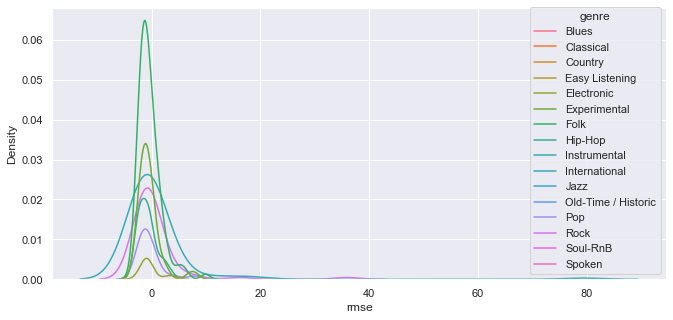

In [59]:
#fig,ax = plt.figure(figsize=(12,4))
sns.set(rc={'figure.figsize':(11,5)})
sns.kdeplot(data=compressed_features,x='rmse',hue='genre')



<AxesSubplot:xlabel='mfcc', ylabel='Density'>

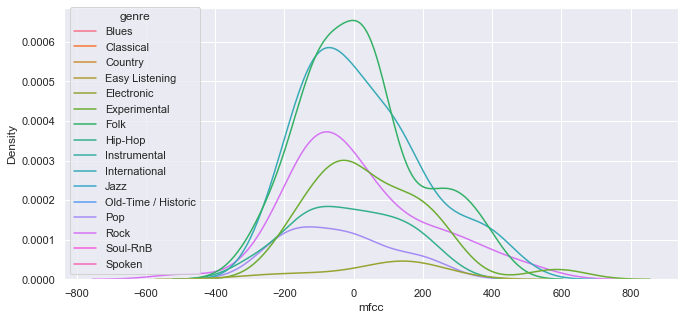

In [60]:
sns.set(rc={'figure.figsize':(11,5)})
sns.kdeplot(data=compressed_features,x='mfcc',hue='genre')
        

<AxesSubplot:xlabel='spectral_bandwidth', ylabel='Density'>

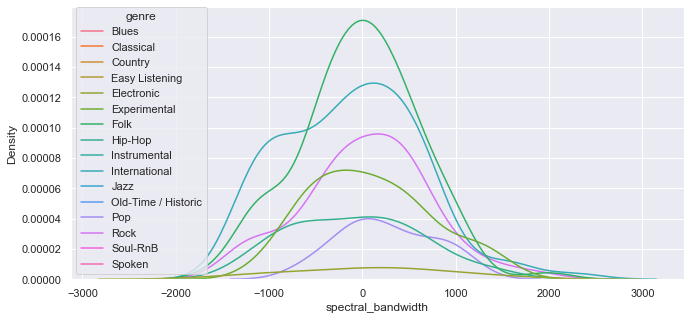

In [61]:
sns.set(rc={'figure.figsize':(11,5)})
sns.kdeplot(data=compressed_features,x='spectral_bandwidth',hue='genre')

<AxesSubplot:xlabel='spectral_centroid', ylabel='Density'>

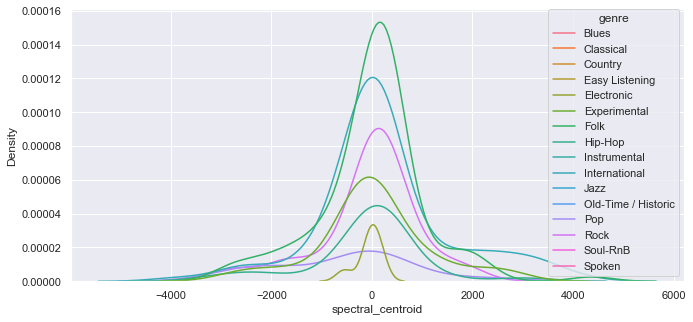

In [62]:
sns.set(rc={'figure.figsize':(11,5)})
sns.kdeplot(data=compressed_features,x='spectral_centroid',hue='genre')

<AxesSubplot:xlabel='spectral_contrast', ylabel='Density'>

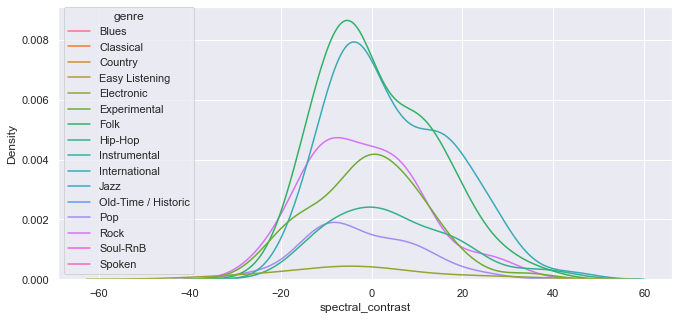

In [63]:
sns.set(rc={'figure.figsize':(11,5)})
sns.kdeplot(data=compressed_features,x='spectral_contrast',hue='genre')